In [1]:
pip install gym numpy

In [2]:
import gym
import numpy as np

class InteractionAgentEnv(gym.Env):
    def __init__(self):
        super(InteractionAgentEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(3)  # Three possible actions
        self.observation_space = gym.spaces.Box(low=0, high=10, shape=(1,), dtype=np.float32)
        self.state = None
        self.timestep = 0

        # Define rewards for specific states
        self.state_reward_map = {
            0: 2,    # Reward for state 0
            1: 3,    # Reward for state 1
            2: 1,    # Reward for state 2
            3: -1,   # Reward for state 3
            4: 0,    # Reward for state 4
            5: 2,    # Reward for state 5
            6: 4,    # Reward for state 6
            7: 0,    # Reward for state 7
            8: 3,    # Reward for state 8
            9: 1,    # Reward for state 9
        }

    def reset(self):
        self.state = np.random.uniform(low=0, high=10, size=(1,))
        self.timestep = 0
        return self.state

    def step(self, action):
        self.timestep += 1

        # Update state (simple random walk)
        self.state = np.random.uniform(low=0, high=10, size=(1,))

        # Map state to a discrete value for reward lookup
        discrete_state = int(np.clip(self.state[0], 0, 9))  # Ensure state is between 0 and 9
        reward = self.state_reward_map.get(discrete_state, 0)  # Default to 0 if state not found

        done = self.timestep >= 10  # End after 10 timesteps
        return self.state, reward, done, {}

    def render(self):
        current_reward = self.state_reward_map.get(int(np.clip(self.state[0], 0, 9)), 0)
        print(f"State: {self.state[0]:.2f}, Reward: {current_reward}, Timestep: {self.timestep}")

# Create environment
env = InteractionAgentEnv()

# Run the agent
total_rewards = []
reward_history = []  # List to store rewards for each timestep
total_timesteps = 0

state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Random action for illustration
    next_state, reward, done, info = env.step(action)

    total_rewards.append(reward)
    reward_history.append(reward)  # Track rewards over timesteps
    total_timesteps += 1

    env.render()

# Calculate action value
sum_of_rewards = sum(total_rewards)
action_value = sum_of_rewards / total_timesteps if total_timesteps > 0 else 0

print(f"Total Rewards: {sum_of_rewards}, Total Timesteps: {total_timesteps}, Action Value: {action_value:.2f}")


State: 8.53, Reward: 3, Timestep: 1
State: 9.30, Reward: 1, Timestep: 2
State: 1.67, Reward: 3, Timestep: 3
State: 0.79, Reward: 2, Timestep: 4
State: 4.62, Reward: 0, Timestep: 5
State: 0.15, Reward: 2, Timestep: 6
State: 8.36, Reward: 3, Timestep: 7
State: 1.85, Reward: 3, Timestep: 8
State: 0.45, Reward: 2, Timestep: 9
State: 3.62, Reward: -1, Timestep: 10
Total Rewards: 18, Total Timesteps: 10, Action Value: 1.80


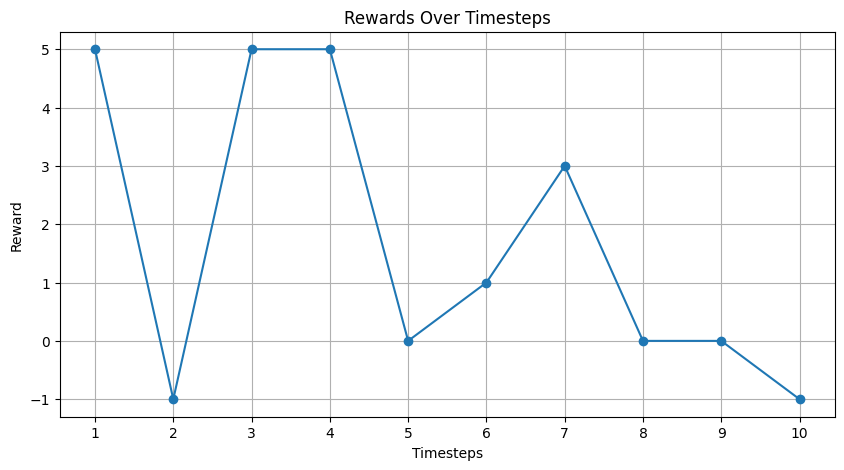

In [ ]:
import matplotlib.pyplot as plt

# Plotting the rewards over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, total_timesteps + 1), reward_history, marker='o')
plt.title('Rewards Over Timesteps')
plt.xlabel('Timesteps')
plt.ylabel('Reward')
plt.xticks(range(1, total_timesteps + 1))
plt.grid()
plt.show()
